## DSC-680 Project#1

### Name: <span style="font-size: smaller;">Syed Shahid Shabbir</span>

#### Predicting Crime Rates in Chicago

##### Project Overview:
This project focuses on building an intelligent crime prediction model using Chicago's crime dataset. It analyzes temporal and spatial crime trends, identifies patterns in crime types and locations, and forecasts future occurrences. The goal is to provide actionable insights for improving public safety and optimizing resource allocation.

Link to the Dataset: https://www.kaggle.com/datasets/utkarshx27/crimes-2001-to-present

In [59]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
# dataframes creation for both training and testing datasets 
chicago_df = pd.read_csv(r'C:\Users\Utility\Desktop\Chicago_Crime\Crimes_-_2001_to_Present.csv',on_bad_lines='skip',
                        usecols = ['Date', 'Primary Type', 'Location Description','Latitude','Longitude' ])


In [61]:
# To Know how many missing values are in the data column wise
miss_val_df = pd.DataFrame(chicago_df.isnull().sum())
miss_val_df['Missing Percentage'] = (miss_val_df[0]/len(chicago_df))*100
miss_val_df = miss_val_df.rename(columns={0:'Missing Values'})
miss_val_df = miss_val_df[~miss_val_df.index.duplicated(keep='first')] 
miss_val_df

,Missing Values,Missing Percentage
Date,0,0.000000
Primary Type,0,0.000000
Location Description,10381,0.133352
Latitude,86848,1.115629
Longitude,86848,1.115629


In [62]:
# Date is not in Datetime data type so convert it first
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'],format="%m/%d/%Y %I:%M:%S %p")
# df.Date = pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 5 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Location Description  object        
 3   Latitude              float64       
 4   Longitude             float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 297.0+ MB


In [63]:
# Use Date Column as an Index for analysis based on Date
chicago_df.index = pd.DatetimeIndex(chicago_df['Date'])
chicago_df.head()

,Date,Primary Type,Location Description,Latitude,Longitude
Date,,,,,
2015-09-05 13:30:00,2015-09-05 13:30:00,BATTERY,RESIDENCE,41.815117,-87.670000
2015-09-04 11:30:00,2015-09-04 11:30:00,THEFT,CTA BUS,41.895080,-87.765400
2018-09-01 00:01:00,2018-09-01 00:01:00,THEFT,RESIDENCE,NaN,NaN
2015-09-05 12:45:00,2015-09-05 12:45:00,NARCOTICS,SIDEWALK,41.937406,-87.716650
2015-09-05 13:00:00,2015-09-05 13:00:00,ASSAULT,APARTMENT,41.881903,-87.755121


In [64]:
# Remove rows to have data only for the past 14 years
df = chicago_df[~(chicago_df['Date'] < '2010-01-01')]

### Visualization of Top 15 Primary Types of Crime

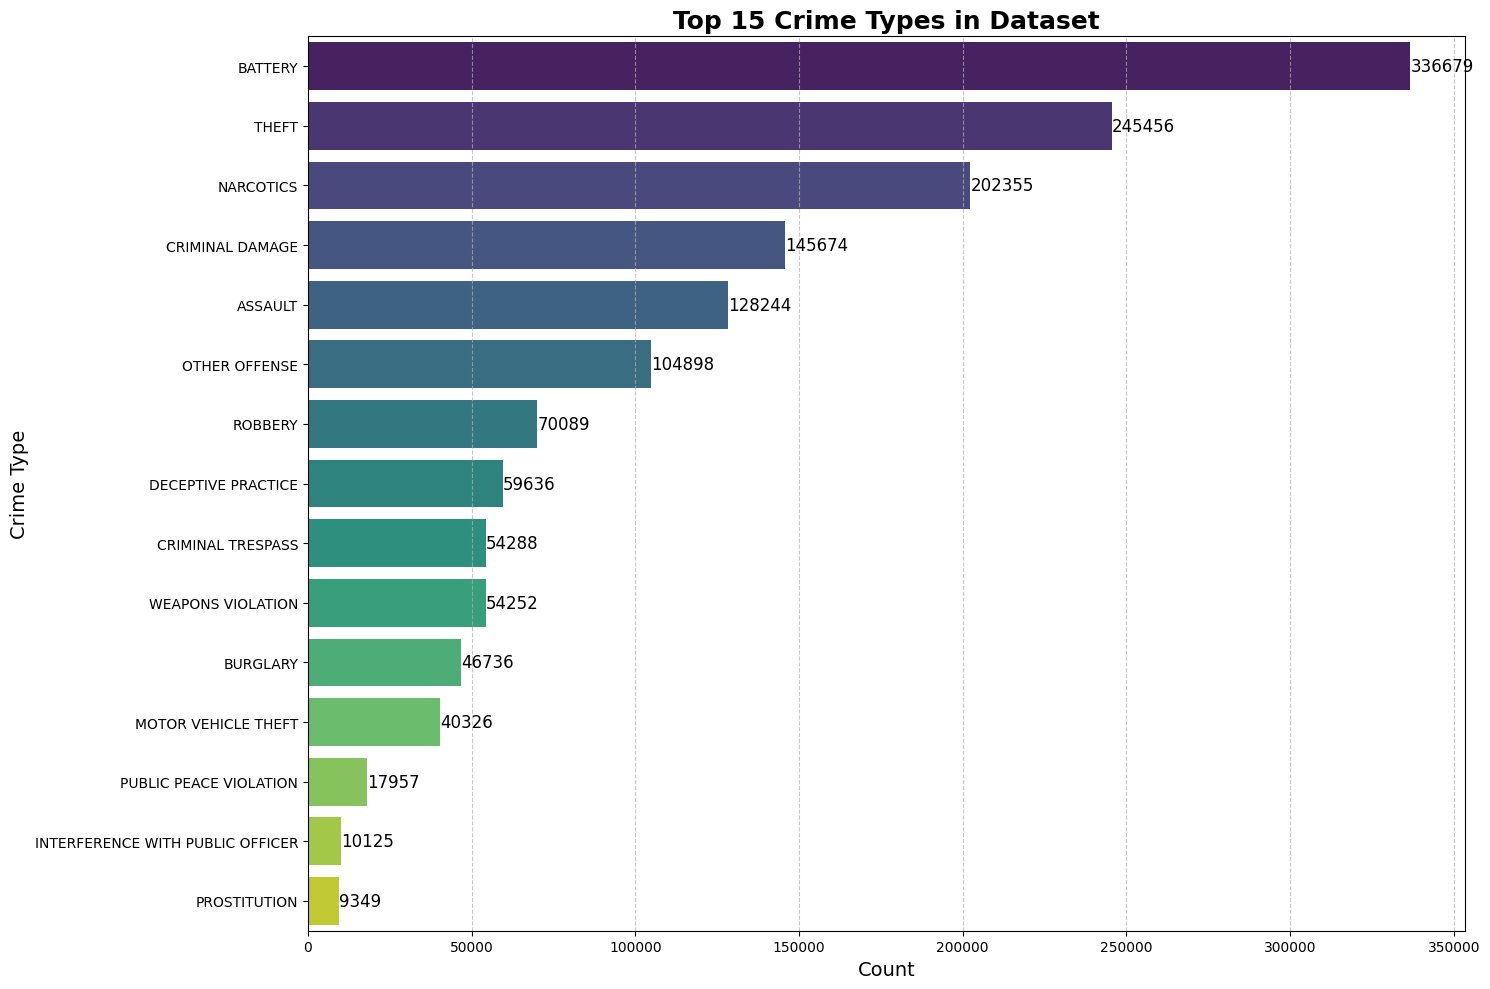

In [69]:
# Get the top 15 'Primary Type' values
columns = df['Primary Type'].value_counts().iloc[:15].index

# Set figure size
plt.figure(figsize=(15, 10))

# Create the count plot with a custom palette
sns.countplot(
    y='Primary Type', 
    data=df, 
    order=columns, 
    palette='viridis'
)

# Add title and labels
plt.title('Top 15 Crime Types in Dataset', fontsize=18, weight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

# Add data labels to the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show gridlines for x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Visualization of Top 15 Locations Where Crimes occured

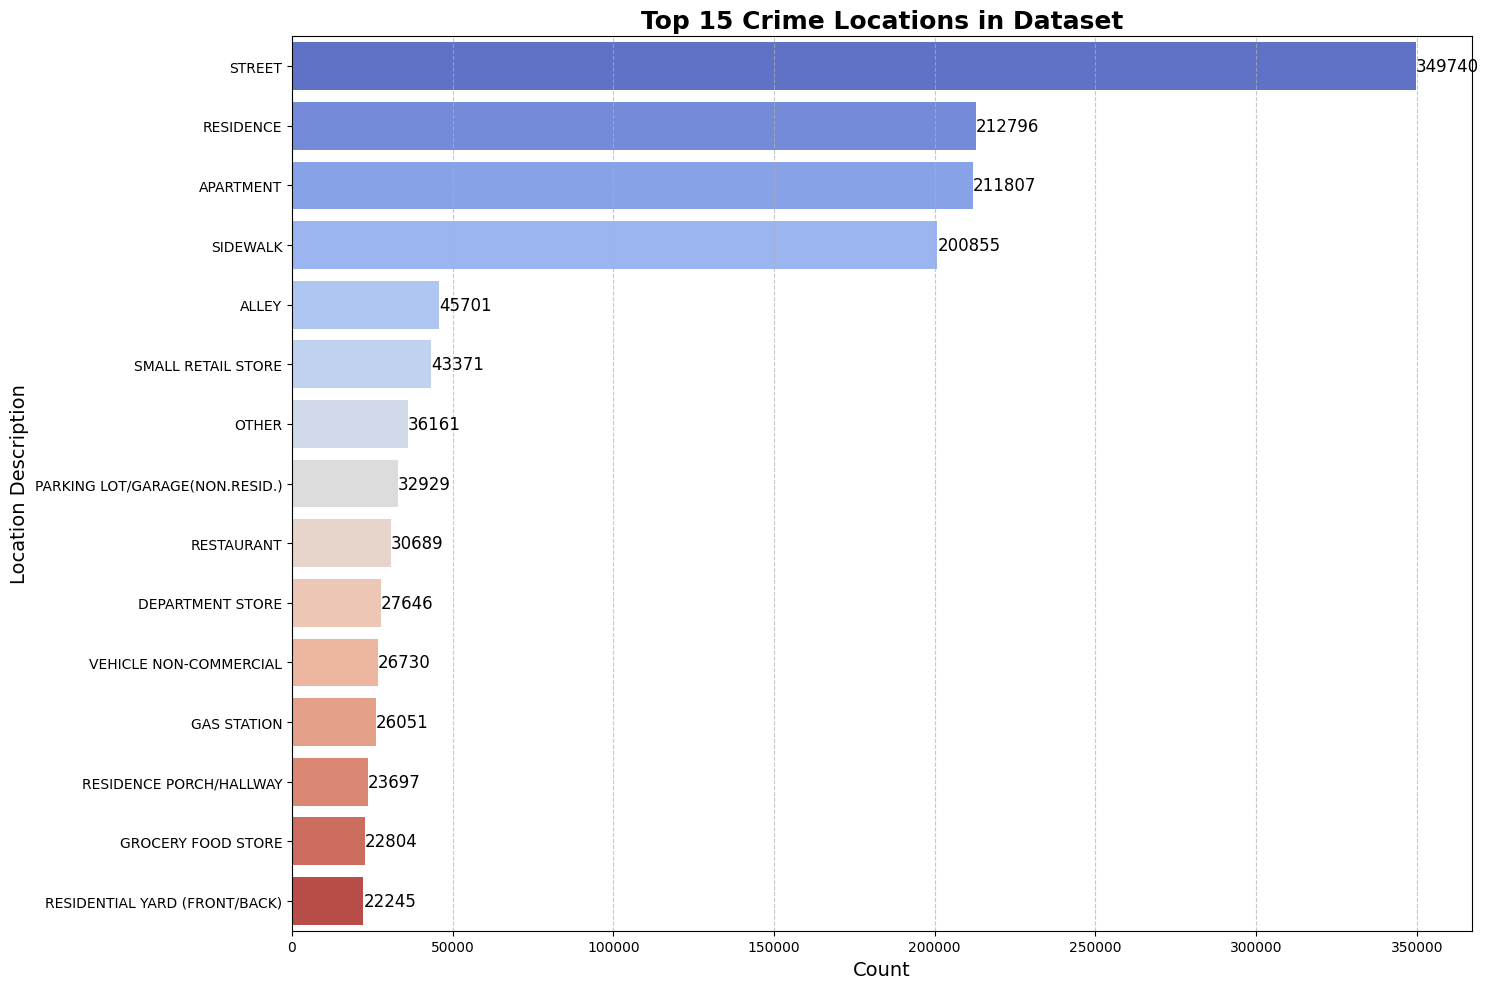

In [70]:
# Get the top 15 'Location Description' values
top_locations = df['Location Description'].value_counts().iloc[:15].index

# Set figure size
plt.figure(figsize=(15, 10))

# Create the count plot with a custom palette
sns.countplot(
    y='Location Description',
    data=df,
    order=top_locations,
    palette='coolwarm'
)

# Add title and labels
plt.title('Top 15 Crime Locations in Dataset', fontsize=18, weight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Location Description', fontsize=14)

# Add data labels to the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show gridlines for the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


### Crimes per year

In [71]:
crimes_per_year = df.resample('Y').size()
crimes_per_year

Date
2010-12-31    129445
2011-12-31    124614
2012-12-31    121678
2013-12-31    117563
2014-12-31    113170
2015-12-31    112346
2016-12-31    113435
2017-12-31    116999
2018-12-31    123359
2019-12-31    127475
2020-12-31    108971
2021-12-31    105925
2022-12-31    112132
2023-12-31     35460
Freq: A-DEC, dtype: int64

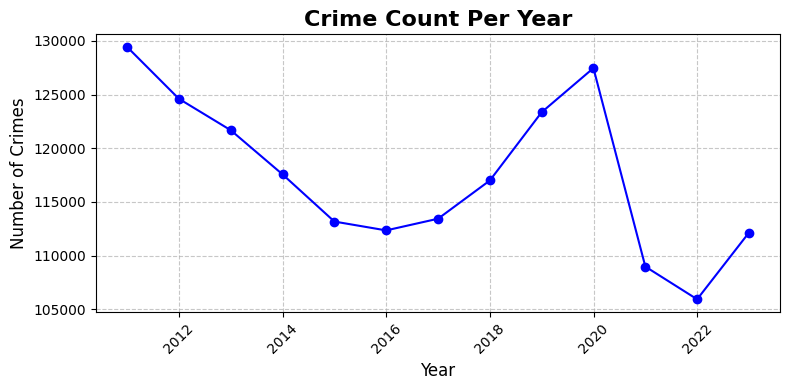

In [80]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(crimes_per_year[:-1], marker='o', linestyle='-', color='blue')

# Add title and axis labels
plt.title("Crime Count Per Year", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Crimes per Month

In [81]:
crimes_per_month = df.resample('M').size()
crimes_per_month

Date
2010-01-31    10848
2010-02-28     9557
2010-03-31    11512
2010-04-30    10994
2010-05-31    11402
              ...  
2022-12-31     9195
2023-01-31     9809
2023-02-28     8876
2023-03-31     9912
2023-04-30     6863
Freq: M, Length: 160, dtype: int64

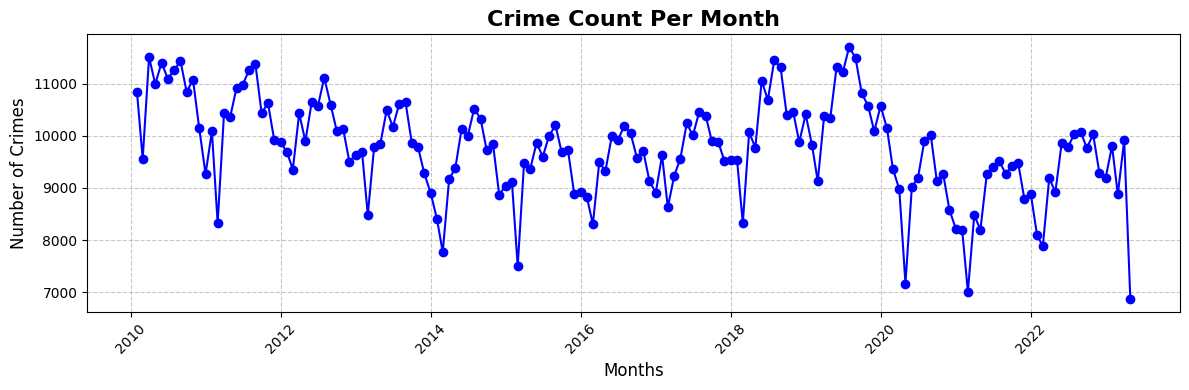

In [88]:
# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(crimes_per_month, marker='o', linestyle='-', color='blue')

# Add title and axis labels
plt.title("Crime Count Per Month", fontsize=16, weight='bold')
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Crimes per Quarter

In [90]:
crimes_per_quarter = df.resample('Q').size()
crimes_per_quarter.head()

Date
2010-03-31    31917
2010-06-30    33494
2010-09-30    33536
2010-12-31    30498
2011-03-31    28844
Freq: Q-DEC, dtype: int64

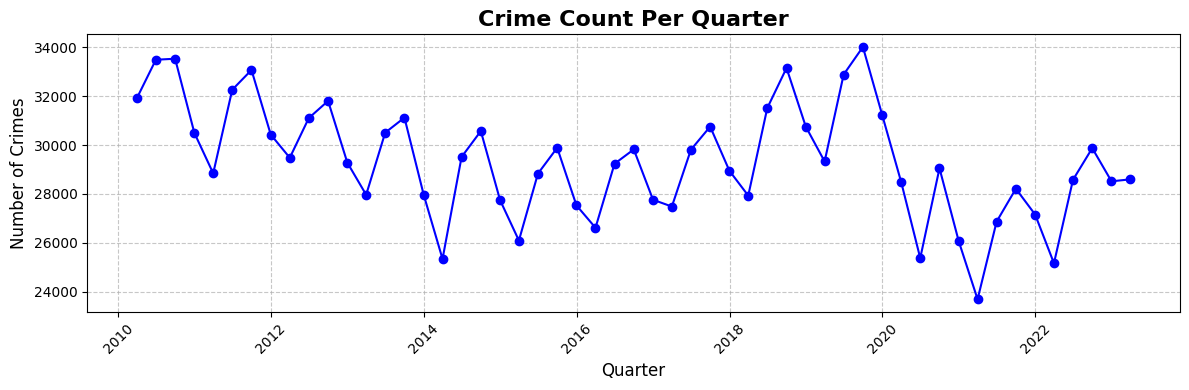

In [92]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(crimes_per_quarter[:-1], marker='o', linestyle='-', color='blue')

# Add title and axis labels
plt.title("Crime Count Per Quarter", fontsize=16, weight='bold')
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Data Processing

In [93]:
# Make new dataframe with Date and it's count Monthly bases to feed the data to Prophet
df_prophet = df.resample('M').size().reset_index()
df_prophet

,Date,0
0,2010-01-31,10848
1,2010-02-28,9557
2,2010-03-31,11512
3,2010-04-30,10994
4,2010-05-31,11402
...,...,...
155,2022-12-31,9195
156,2023-01-31,9809
157,2023-02-28,8876
158,2023-03-31,9912


In [94]:
df_prophet_final = df_prophet.rename(columns={'Date':'ds',0:'y'})
df_prophet_final

,ds,y
0,2010-01-31,10848
1,2010-02-28,9557
2,2010-03-31,11512
3,2010-04-30,10994
4,2010-05-31,11402
...,...,...
155,2022-12-31,9195
156,2023-01-31,9809
157,2023-02-28,8876
158,2023-03-31,9912


In [97]:
df_prophet_final

,ds,y
0,2010-01-31,10848
1,2010-02-28,9557
2,2010-03-31,11512
3,2010-04-30,10994
4,2010-05-31,11402
...,...,...
155,2022-12-31,9195
156,2023-01-31,9809
157,2023-02-28,8876
158,2023-03-31,9912


<Figure size 1600x800 with 0 Axes>

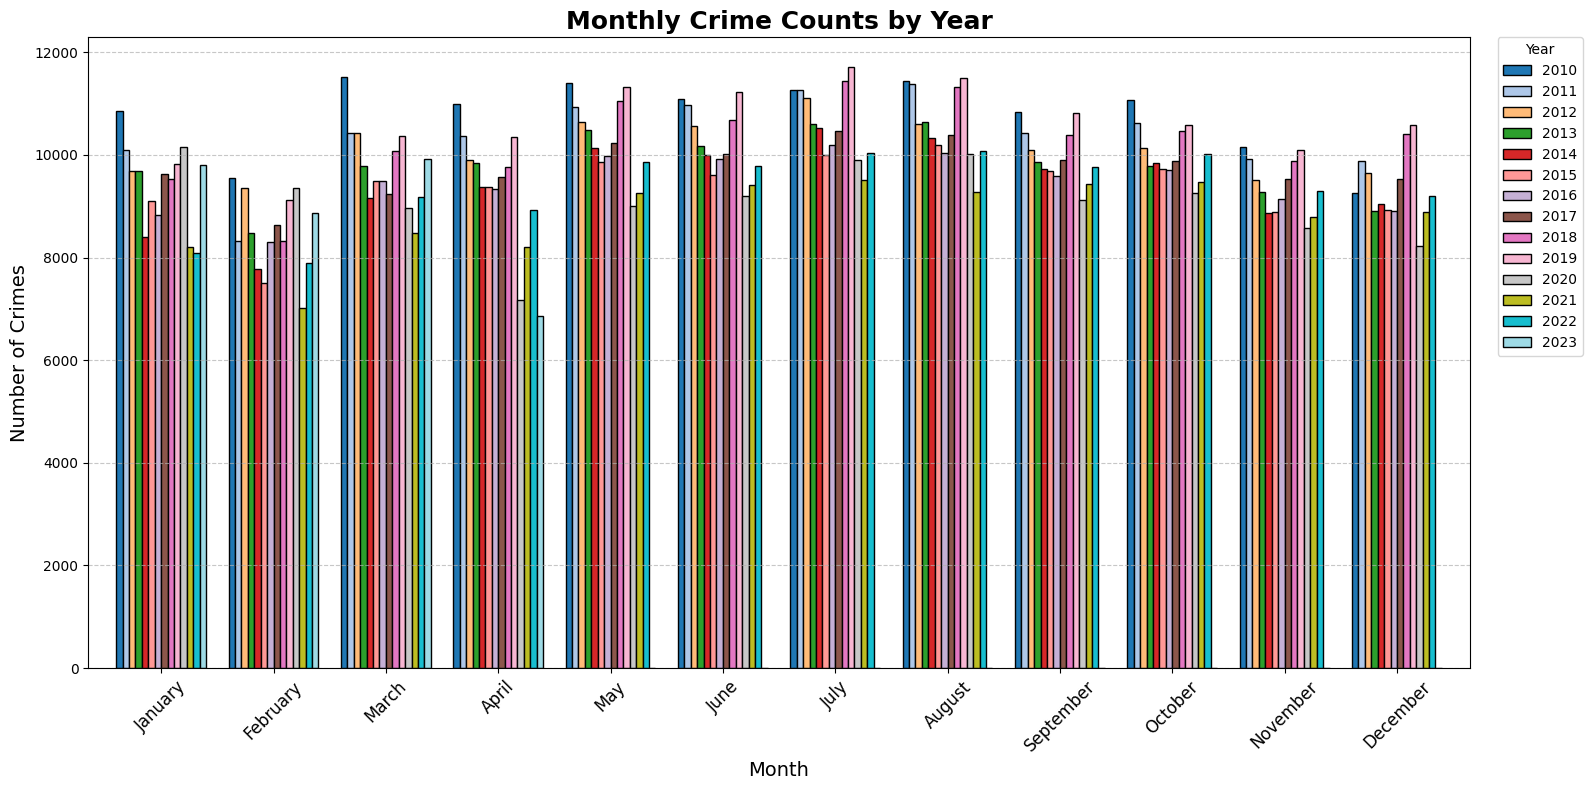

In [100]:
# Extract Year and Month from the 'ds' column
df_prophet_final['Year'] = pd.to_datetime(df_prophet_final['ds']).dt.year
df_prophet_final['Month'] = pd.to_datetime(df_prophet_final['ds']).dt.month_name()

# Pivot the data for a grouped bar chart
pivot_table = df_prophet_final.pivot_table(
    index='Month', columns='Year', values='y', aggfunc='sum'
)

# Reorder months in calendar order
pivot_table = pivot_table.reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Plot grouped bar chart
plt.figure(figsize=(16, 8))
pivot_table.plot(kind='bar', figsize=(16, 8), width=0.8, edgecolor='black', colormap='tab20')

# Add labels and title
plt.title("Monthly Crime Counts by Year", fontsize=18, weight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Year', fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()


### Prediction

In [95]:
model = Prophet()
model.fit(df_prophet_final)
# provide days #to create months for next year
future = model.make_future_dataframe(365) 
# to predict the crimes for new created months of next year
forecast = model.predict(future) 
forecast

04:55:08 - cmdstanpy - INFO - Chain [1] start processing
04:55:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,10958.220720,9783.158021,11113.101397,10958.220720,10958.220720,-495.668950,-495.668950,-495.668950,-495.668950,-495.668950,-495.668950,0.0,0.0,0.0,10462.551770
1,2010-02-28,10934.022267,8823.603342,10089.214384,10934.022267,10934.022267,-1495.036809,-1495.036809,-1495.036809,-1495.036809,-1495.036809,-1495.036809,0.0,0.0,0.0,9438.985458
2,2010-03-31,10907.231122,10184.511930,11493.318889,10907.231122,10907.231122,-87.712951,-87.712951,-87.712951,-87.712951,-87.712951,-87.712951,0.0,0.0,0.0,10819.518171
3,2010-04-30,10881.304207,9672.613993,11041.706570,10881.304207,10881.304207,-563.400596,-563.400596,-563.400596,-563.400596,-563.400596,-563.400596,0.0,0.0,0.0,10317.903611
4,2010-05-31,10854.513062,10636.416050,11974.021984,10854.513062,10854.513062,438.324918,438.324918,438.324918,438.324918,438.324918,438.324918,0.0,0.0,0.0,11292.837981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2024-04-25,8845.806275,8188.274032,9560.667199,8811.948546,8889.212946,-24.554872,-24.554872,-24.554872,-24.554872,-24.554872,-24.554872,0.0,0.0,0.0,8821.251402
521,2024-04-26,8845.177703,8088.606679,9390.514513,8811.173537,8888.770174,-131.179513,-131.179513,-131.179513,-131.179513,-131.179513,-131.179513,0.0,0.0,0.0,8713.998189
522,2024-04-27,8844.549130,7951.410884,9252.679963,8810.462294,8888.327403,-249.416167,-249.416167,-249.416167,-249.416167,-249.416167,-249.416167,0.0,0.0,0.0,8595.132963
523,2024-04-28,8843.920558,7852.612507,9165.095595,8809.732023,8887.884632,-374.399413,-374.399413,-374.399413,-374.399413,-374.399413,-374.399413,0.0,0.0,0.0,8469.521145


### Visualization of Trend

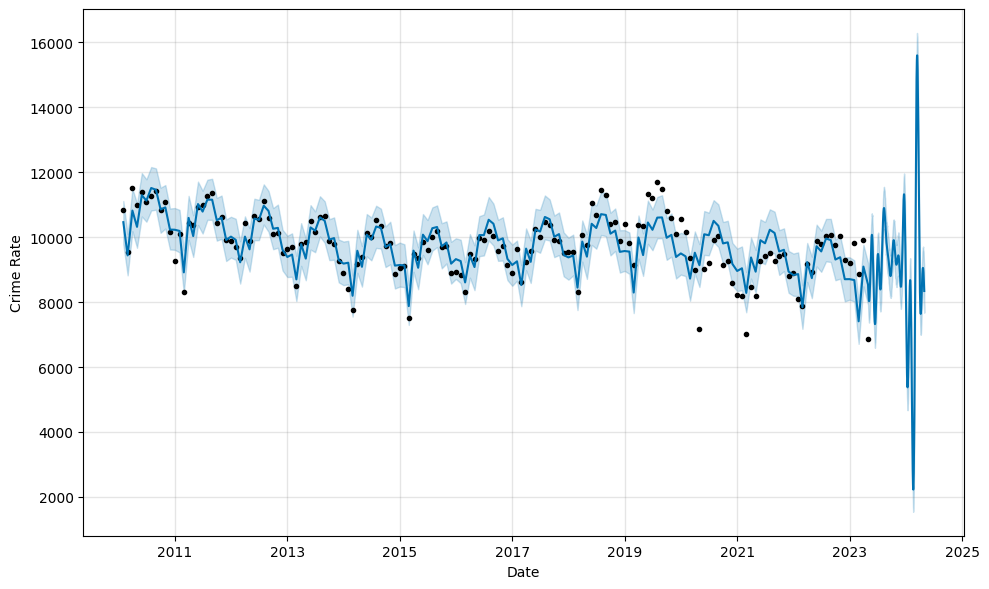

In [96]:
figure = model.plot(forecast, xlabel='Date', ylabel='Crime Rate')

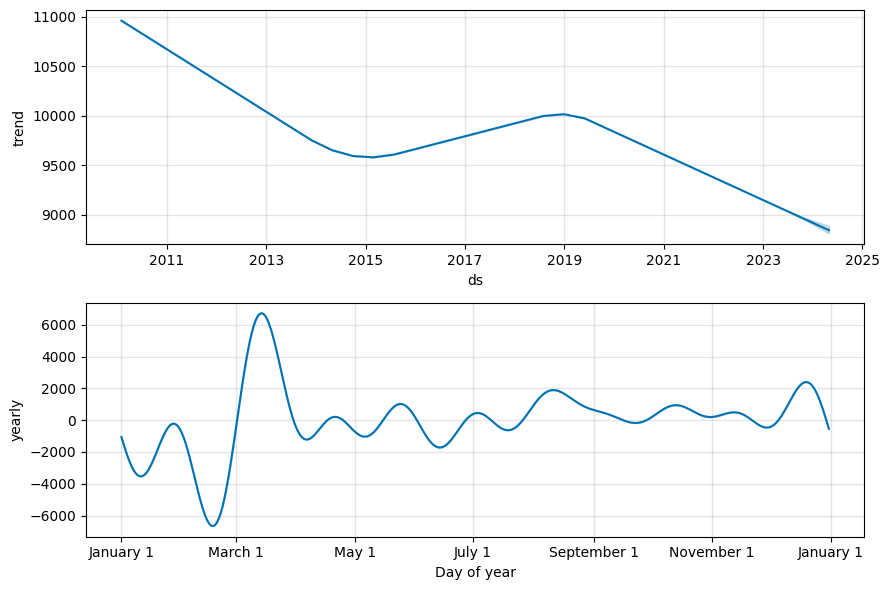

In [101]:
figure = model.plot_components(forecast)

In [102]:
model = Prophet()
model.fit(df_prophet_final)
future = model.make_future_dataframe(periods=710)
forecast = model.predict(future)
forecast


05:00:11 - cmdstanpy - INFO - Chain [1] start processing
05:00:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,10958.220720,9860.317986,11115.661363,10958.220720,10958.220720,-495.668950,-495.668950,-495.668950,-495.668950,-495.668950,-495.668950,0.0,0.0,0.0,10462.551770
1,2010-02-28,10934.022267,8768.832302,10066.293716,10934.022267,10934.022267,-1495.036809,-1495.036809,-1495.036809,-1495.036809,-1495.036809,-1495.036809,0.0,0.0,0.0,9438.985458
2,2010-03-31,10907.231122,10197.408332,11490.699249,10907.231122,10907.231122,-87.712951,-87.712951,-87.712951,-87.712951,-87.712951,-87.712951,0.0,0.0,0.0,10819.518171
3,2010-04-30,10881.304207,9631.816011,10948.787454,10881.304207,10881.304207,-563.400596,-563.400596,-563.400596,-563.400596,-563.400596,-563.400596,0.0,0.0,0.0,10317.903611
4,2010-05-31,10854.513062,10650.947279,11939.078272,10854.513062,10854.513062,438.324918,438.324918,438.324918,438.324918,438.324918,438.324918,0.0,0.0,0.0,11292.837981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2025-04-05,8628.948839,6768.479808,8097.534635,8520.159889,8740.152643,-1178.913475,-1178.913475,-1178.913475,-1178.913475,-1178.913475,-1178.913475,0.0,0.0,0.0,7450.035364
866,2025-04-06,8628.320267,6726.736578,8091.164273,8519.370830,8739.838684,-1218.249679,-1218.249679,-1218.249679,-1218.249679,-1218.249679,-1218.249679,0.0,0.0,0.0,7410.070587
867,2025-04-07,8627.691694,6739.952319,8057.972674,8518.582675,8739.524725,-1211.245272,-1211.245272,-1211.245272,-1211.245272,-1211.245272,-1211.245272,0.0,0.0,0.0,7416.446422
868,2025-04-08,8627.063122,6814.552941,8137.260568,8517.794519,8739.210766,-1163.328992,-1163.328992,-1163.328992,-1163.328992,-1163.328992,-1163.328992,0.0,0.0,0.0,7463.734130


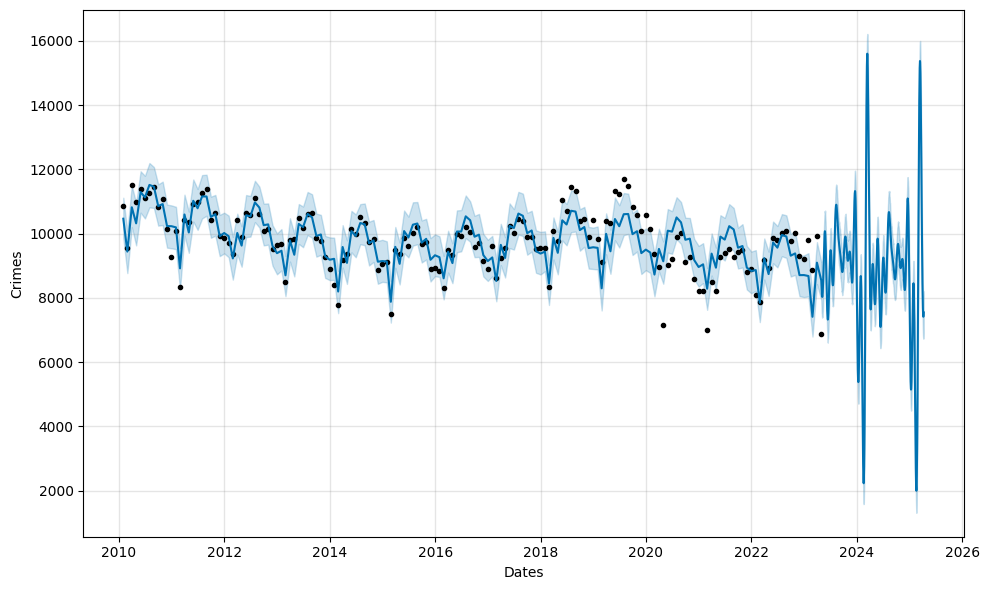

In [103]:
figure = model.plot(forecast, xlabel="Dates", ylabel="Crimes")

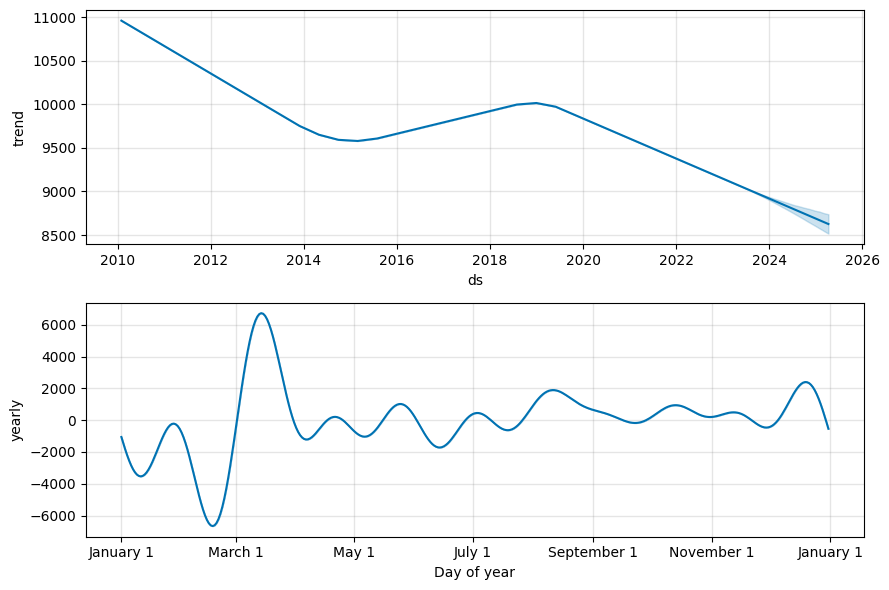

In [104]:
figure = model.plot_components(forecast)

In [ ]:
!pip install plotly


In [111]:
import plotly.express as px
import plotly.graph_objects as go

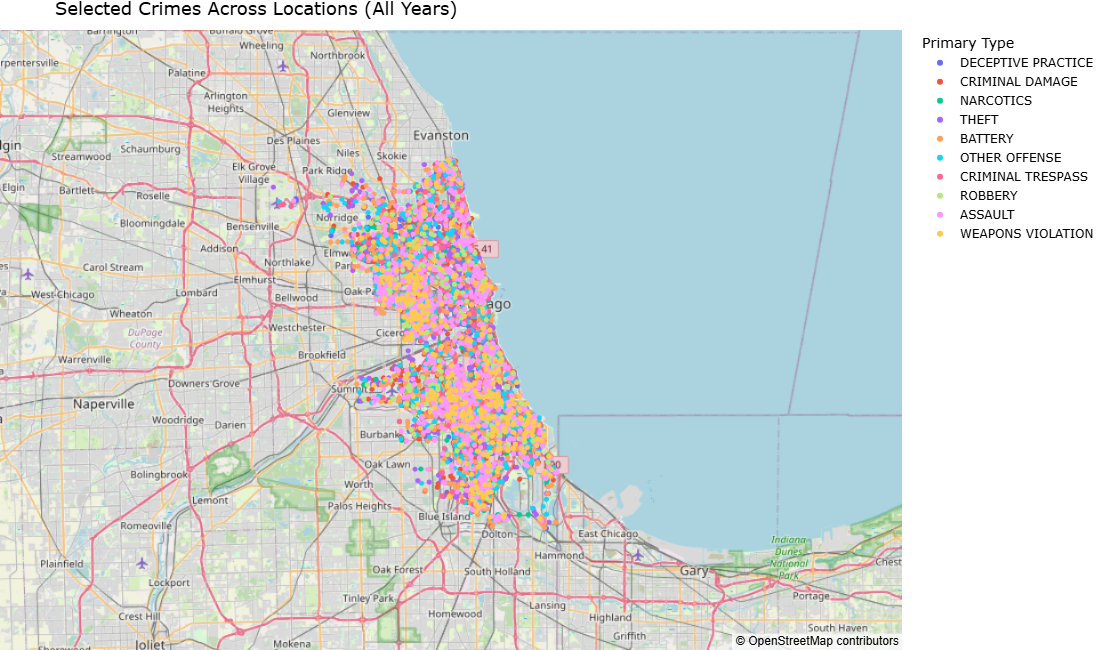

In [135]:
import plotly.express as px

# List of selected crimes
selected_crimes = ['BATTERY', 'THEFT', 'NARCOTICS', 'CRIMINAL DAMAGE', 'ASSAULT',
       'OTHER OFFENSE', 'ROBBERY', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION']

# Prepare the map data
map_marks = df[['Latitude', 'Longitude', 'Primary Type']]
map_marks['Year'] = pd.to_datetime(df.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks = map_marks.dropna()

# Filter data for the selected crimes (remove year filtering)
filtered_map_marks = map_marks[map_marks['Primary Type'].isin(selected_crimes)]

# Ensure there are enough unique colors for all crime types
color_palette = px.colors.qualitative.Plotly  # Default Plotly palette
extended_palette = color_palette * (len(selected_crimes) // len(color_palette) + 1)  # Extend if necessary

# Plot the map
fig = px.scatter_mapbox(
    filtered_map_marks.sample(10000),  # Sample 5000 points to avoid overloading the map
    lat="Latitude",
    lon="Longitude",
    color="Primary Type",  # Unique color for each crime type
    zoom=9,
    height=650,
    title="Selected Crimes Across Locations (All Years)",
    color_discrete_sequence=extended_palette[:len(selected_crimes)]  # Assign unique colors
)

# Use OpenStreetMap as the map style
fig.update_layout(mapbox_style="open-street-map")

# Adjust layout and margins
fig.update_layout(
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
    font=dict(color='black'),  # Use black font for readability on light background
    title_font=dict(size=18, color='black')  # Title in black
)

# Show the map
fig.show()
